<a href="https://colab.research.google.com/github/Jiya-786/ML_notes/blob/main/ML%20TUT/TUT-3%20kaggle%20competition%20on%20regression%20models/KaggleWineCompetition1_regressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LinearRegression model for kaggle competition-1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
wine = pd.read_csv("train (1).csv")

In [3]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      10.400000          0.410000     0.550000        3.200000   0.076000   
1      12.400000          0.350000     0.490000        2.600000   0.079000   
2       7.000000          0.430000     0.300000        2.000000   0.085000   
3       7.400000          0.785000     0.190000        5.200000   0.094000   
4       8.887466          0.303796     0.450977        2.278107   0.062864   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            22.000000             54.000000  0.999600  3.150000   0.890000   
1            27.000000             69.000000  0.999400  3.120000   0.750000   
2             6.000000             39.000000  0.993460  3.330000   0.460000   
3            19.000000             98.000000  0.997130  3.160000   0.520000   
4            26.847723             23.298178  0.994088  3.070791   0.760872   

     alcohol   quality    id  
0   9.900000  6.000000   438  
1  10.400000  6.000000   548  
2  11.900000  6.000000  1187  
3   9.600000  6.000000  1445  
4   9.058471  7.053141  1657

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   float64
 12  id                    1359 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 138.2 KB


In [5]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.294230          0.526008     0.268763        2.548055   
std         1.703897          0.177948     0.193944        1.388372   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.139276          0.635000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.087536            16.164483             47.249511     0.996733   
std       0.046473            10.358108             33.205095     0.001862   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             8.000000             23.000000     0.995600   
50%       0.079000            14.000000             39.000000     0.996760   
75%       0.091000            22.000000             63.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           id  
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.312772     0.656459    10.418676     5.633698   852.687270  
std       0.152372     0.170670     1.069188     0.816853   491.134662  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000   428.500000  
50%       3.310000     0.620000    10.200000     6.000000   856.000000  
75%       3.400000     0.730000    11.100000     6.000000  1277.500000  
max       4.010000     2.000000    14.900000     8.000000  1698.000000

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')

## trying to analyze the data using graphs-

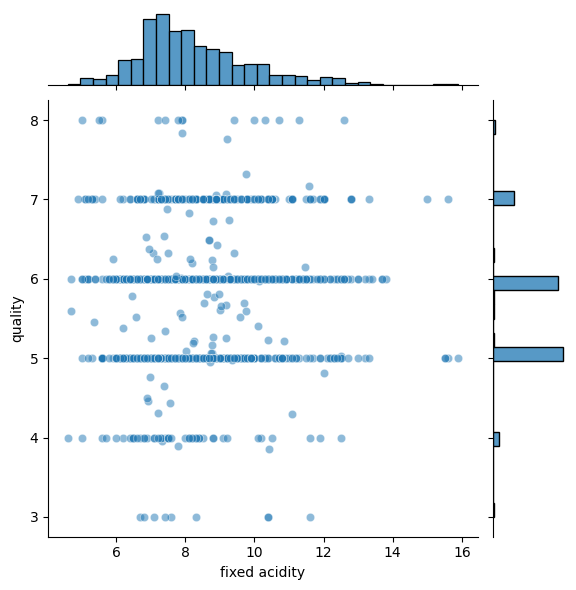

In [7]:
sns.jointplot(x='fixed acidity',y='quality',data=wine,alpha=0.5)

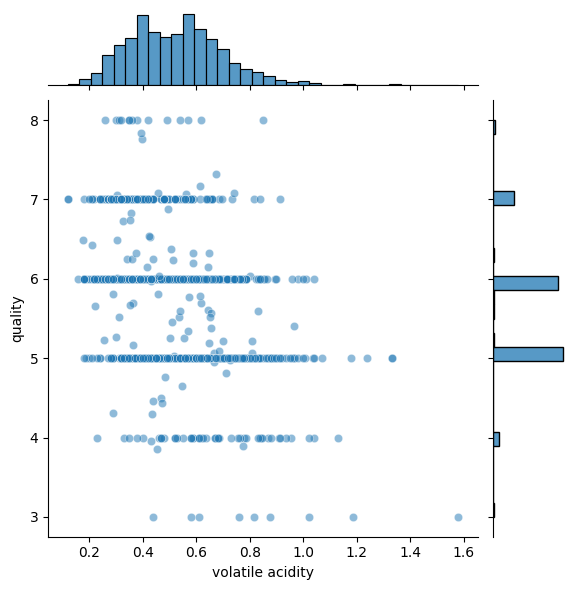

In [8]:
sns.jointplot(x='volatile acidity',y='quality',data=wine,alpha=0.5)

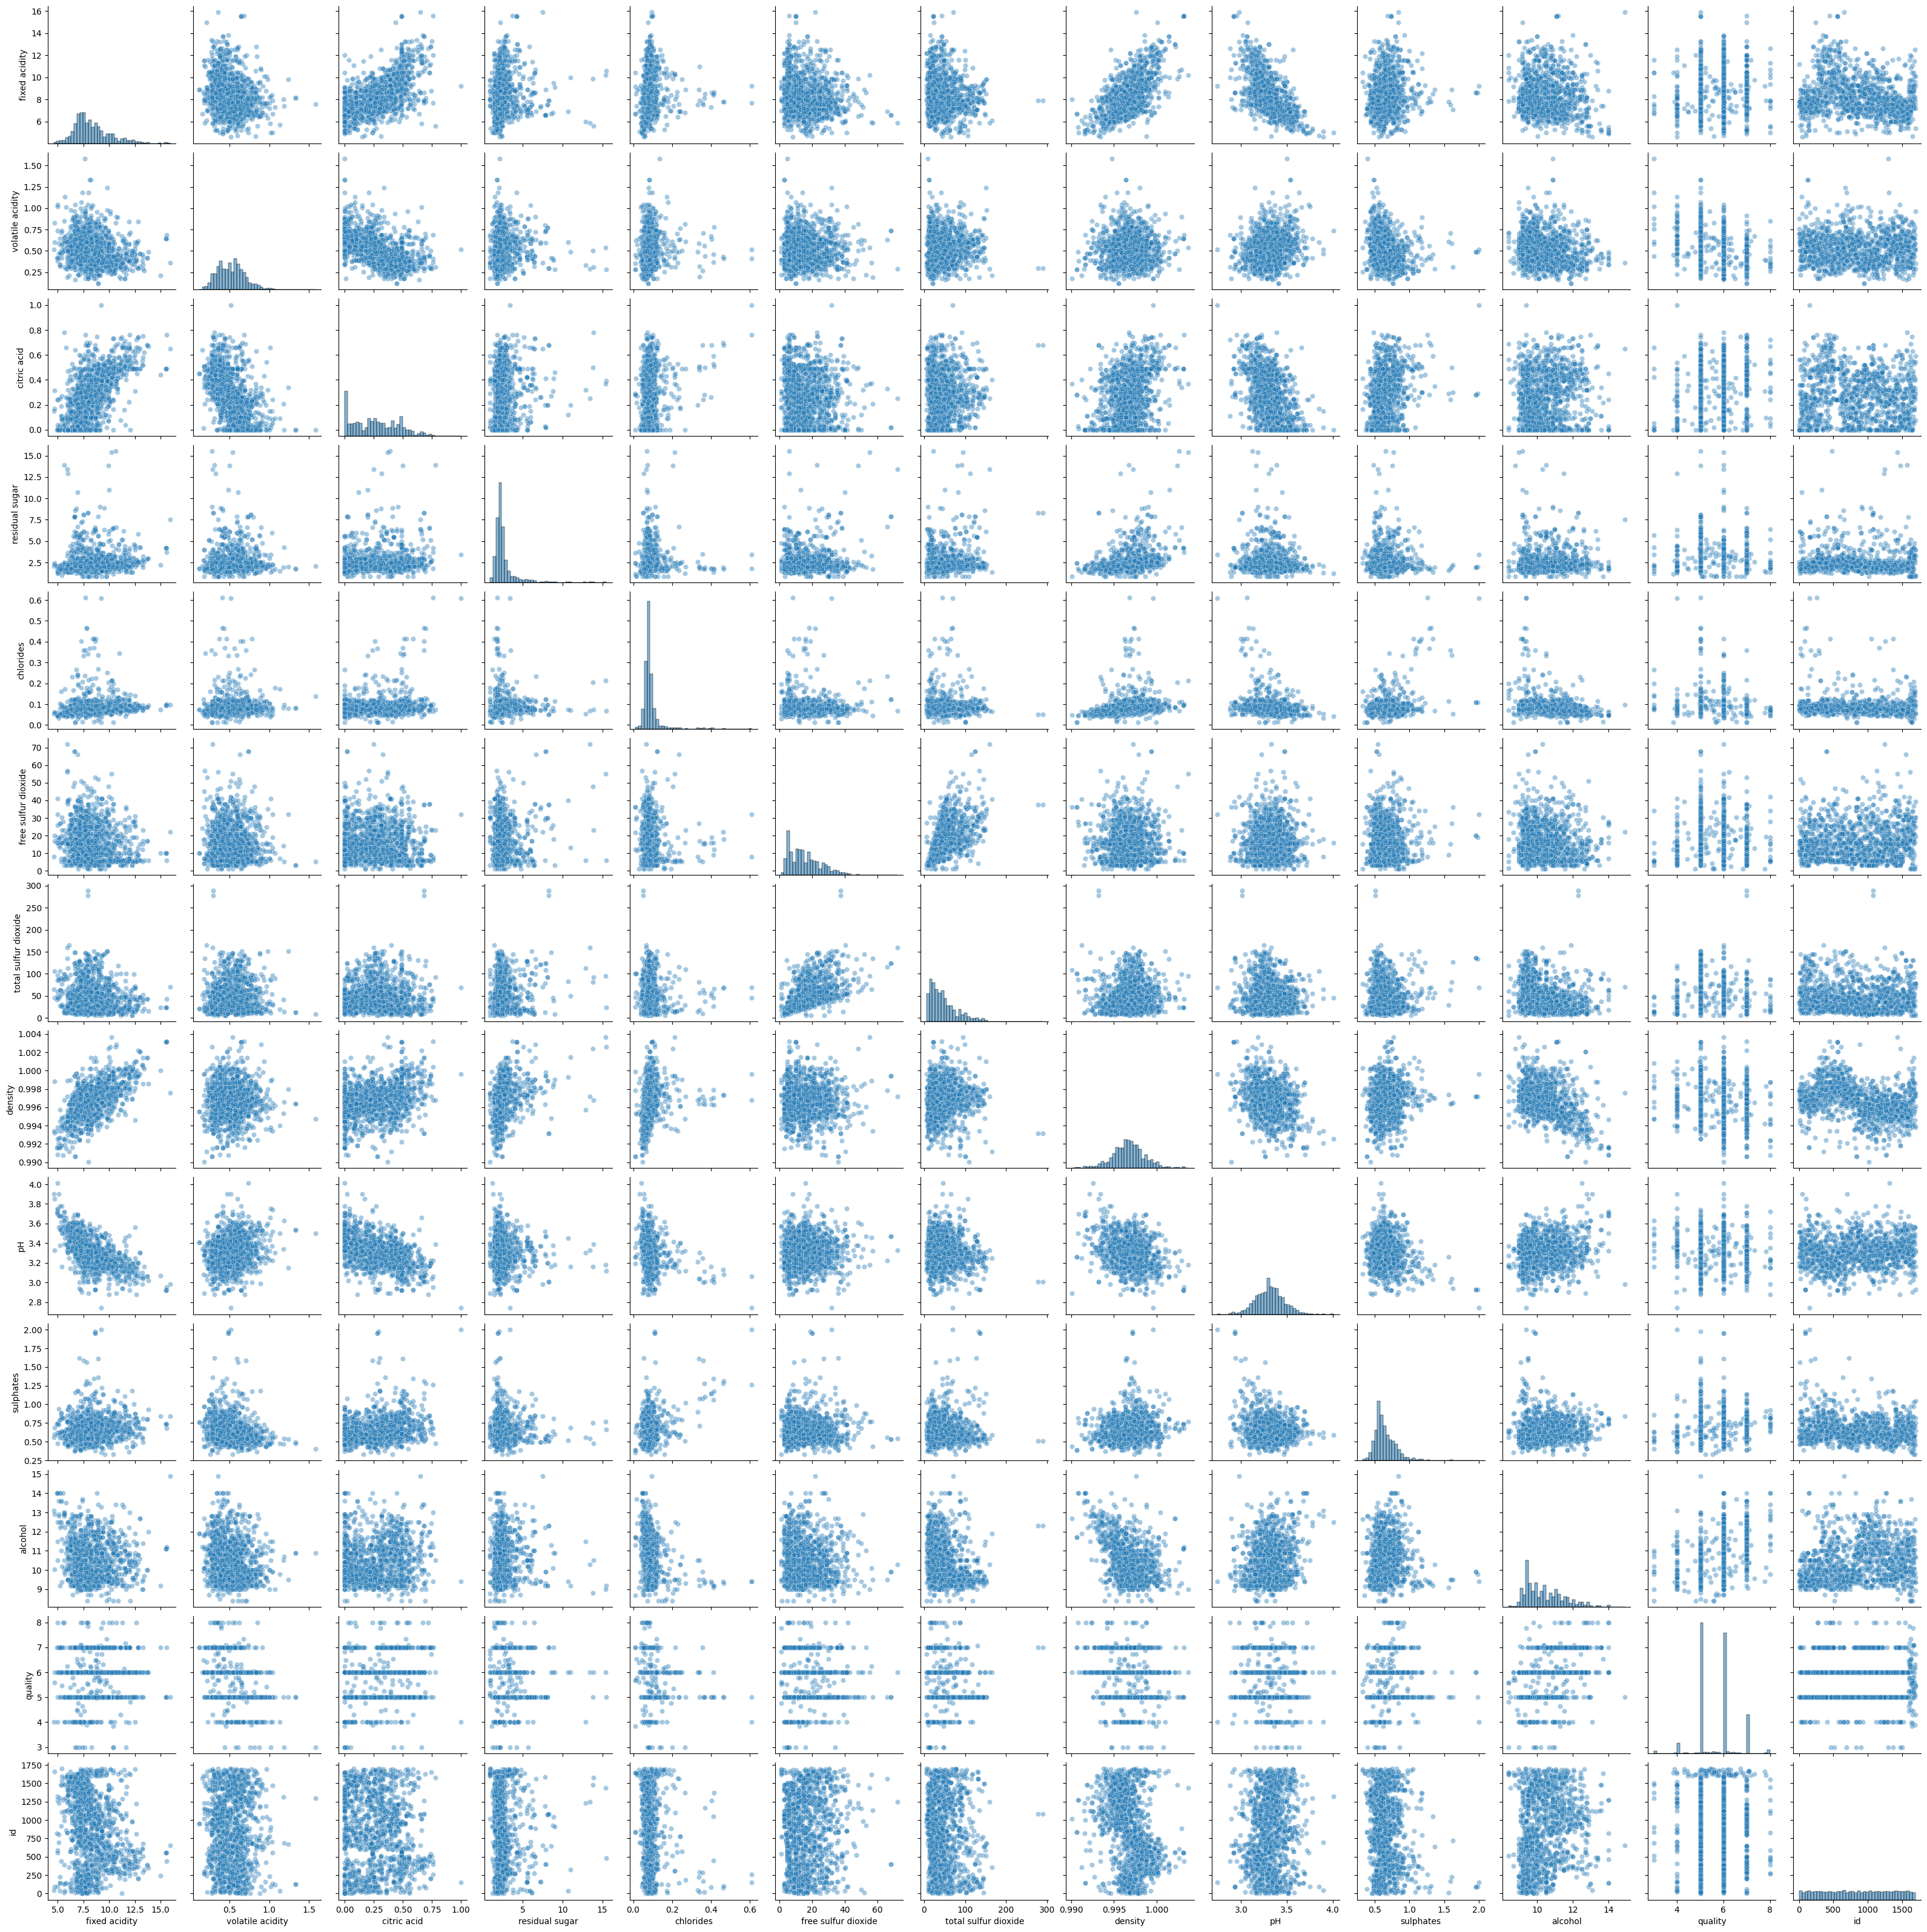

In [9]:
sns.pairplot(wine,kind='scatter',plot_kws={'alpha':0.4},diag_kws={'alpha':0.55,'bins':40})
plt.show()

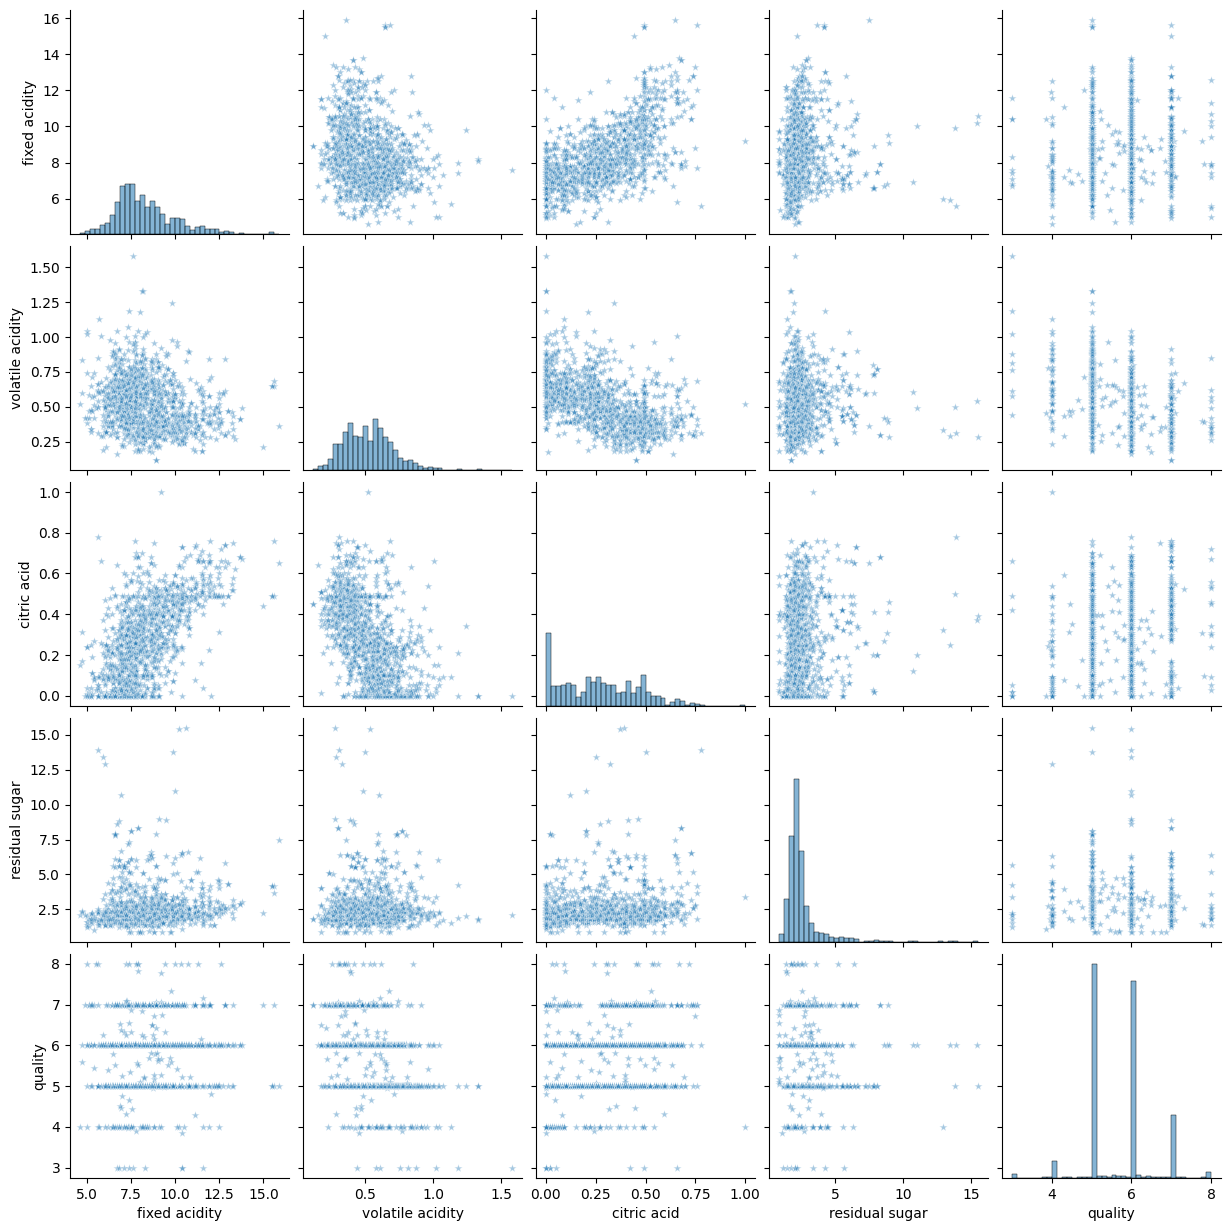

In [10]:
sns.pairplot(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','quality']],kind='scatter',plot_kws={'alpha':0.4,'marker':'*'},diag_kws={'alpha':0.55,'bins':40})
plt.show()

In [11]:
# Compute correlation with target
# corr = wine.corr()['quality'].sort_values(ascending=False)
# print(corr)

corr = wine.corr()
display(corr)


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.226032     0.624410   
volatile acidity          -0.226032          1.000000    -0.524850   
citric acid                0.624410         -0.524850     1.000000   
residual sugar             0.103977          0.013260     0.147713   
chlorides                  0.093698          0.054850     0.193997   
free sulfur dioxide       -0.149628         -0.013870    -0.056092   
total sulfur dioxide      -0.106880          0.068687     0.051688   
density                    0.631067          0.041417     0.333326   
pH                        -0.639249          0.230610    -0.508750   
sulphates                  0.142804         -0.258690     0.291921   
alcohol                   -0.053970         -0.207531     0.099292   
quality                    0.098612         -0.383922     0.206955   
id                        -0.216604         -0.013271    -0.134390   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.103977   0.093698            -0.149628   
volatile acidity            0.013260   0.054850            -0.013870   
citric acid                 0.147713   0.193997            -0.056092   
residual sugar              1.000000   0.037912             0.152191   
chlorides                   0.037912   1.000000            -0.005568   
free sulfur dioxide         0.152191  -0.005568             1.000000   
total sulfur dioxide        0.209917   0.033900             0.632470   
density                     0.330011   0.186677            -0.025815   
pH                         -0.079278  -0.253238             0.073626   
sulphates                   0.001908   0.354671             0.047865   
alcohol                     0.054481  -0.197940            -0.076078   
quality                     0.002111  -0.126890            -0.042774   
id                         -0.030332  -0.117676             0.087085   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.106880  0.631067 -0.639249   0.142804   
volatile acidity                  0.068687  0.041417  0.230610  -0.258690   
citric acid                       0.051688  0.333326 -0.508750   0.291921   
residual sugar                    0.209917  0.330011 -0.079278   0.001908   
chlorides                         0.033900  0.186677 -0.253238   0.354671   
free sulfur dioxide               0.632470 -0.025815  0.073626   0.047865   
total sulfur dioxide              1.000000  0.060368 -0.073077   0.037473   
density                           0.060368  1.000000 -0.328240   0.115476   
pH                               -0.073077 -0.328240  1.000000  -0.188670   
sulphates                         0.037473  0.115476 -0.188670   1.000000   
alcohol                          -0.199869 -0.459722  0.195353   0.100219   
quality                          -0.163911 -0.200548 -0.043509   0.227489   
id                               -0.099480 -0.320380  0.107216  -0.128328   

                       alcohol   quality        id  
fixed acidity        -0.053970  0.098612 -0.216604  
volatile acidity     -0.207531 -0.383922 -0.013271  
citric acid           0.099292  0.206955 -0.134390  
residual sugar        0.054481  0.002111 -0.030332  
chlorides            -0.197940 -0.126890 -0.117676  
free sulfur dioxide  -0.076078 -0.042774  0.087085  
total sulfur dioxide -0.199869 -0.163911 -0.099480  
density              -0.459722 -0.200548 -0.320380  
pH                    0.195353 -0.043509  0.107216  
sulphates             0.100219  0.227489 -0.128328  
alcohol               1.000000  0.474572  0.218855  
quality               0.474572  1.000000  0.073295  
id                    0.218855  0.073295  1.000000

# splitting the data into x and y :

In [12]:
X=wine[['volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y=wine['quality']

In [13]:
X.head()

volatile acidity  citric acid  chlorides  total sulfur dioxide   density  \
0          0.410000     0.550000   0.076000             54.000000  0.999600   
1          0.350000     0.490000   0.079000             69.000000  0.999400   
2          0.430000     0.300000   0.085000             39.000000  0.993460   
3          0.785000     0.190000   0.094000             98.000000  0.997130   
4          0.303796     0.450977   0.062864             23.298178  0.994088   

   sulphates    alcohol  
0   0.890000   9.900000  
1   0.750000  10.400000  
2   0.460000  11.900000  
3   0.520000   9.600000  
4   0.760872   9.058471

In [14]:
y.head()

0    6.000000
1    6.000000
2    6.000000
3    6.000000
4    7.053141
Name: quality, dtype: float64

# training the model with multivariable regression using scikit learn:

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X,y)

LinearRegression()

In [18]:
# the coeff-
lm.coef_

array([-1.09306920e+00,  1.44451571e-01, -1.73693522e+00, -1.94826016e-03,
       -1.53066698e+01,  7.77461371e-01,  2.70486667e-01])

In [19]:
# r squared-
lm.score(X,y)

0.336006162555185

In [23]:
validation_set=pd.read_csv("validation (1).csv")
final_x=validation_set[['volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]


predictions=lm.predict(final_x)

# final_y=validation_set['quality']
# here our validation.csv does not have quality column so we can't
# plot correctness of our prediction, we need to submit on kaggle to
# check vlaue of error. so far the best is 0.38


In [24]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)


                           Coef
volatile acidity      -1.093069
citric acid            0.144452
chlorides             -1.736935
total sulfur dioxide  -0.001948
density              -15.306670
sulphates              0.777461
alcohol                0.270487


In [25]:
# 6. Create the submission DataFrame
# Kaggle expects exactly two columns: 'id' and 'quality'
submission_linreg = pd.DataFrame({
    'id': validation_set['id'],
    'quality': predictions
})

# 7. Export to CSV
# index=False is crucial so it doesn't add an extra column
submission_linreg.to_csv('submission_linregression.csv', index=False)

print("File 'submission_linregression.csv' created successfully!")

File 'submission_linregression.csv' created successfully!


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Features from your notebook
features = ['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = wine[features]
y = wine['quality']

# 1. Transform features to Polynomial (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 2. Train the Model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# 3. Predict on validation set
# (Assuming your validation data is in 'validation_set' as seen in your notebook)
X_val_poly = poly.transform(validation_set[features])
poly_preds = poly_reg.predict(X_val_poly)

# 4. Save for Kaggle
submission_reg = pd.DataFrame({
    'id': validation_set['id'],
    'quality': poly_preds
})
submission_reg.to_csv('submission_regression.csv', index=False)

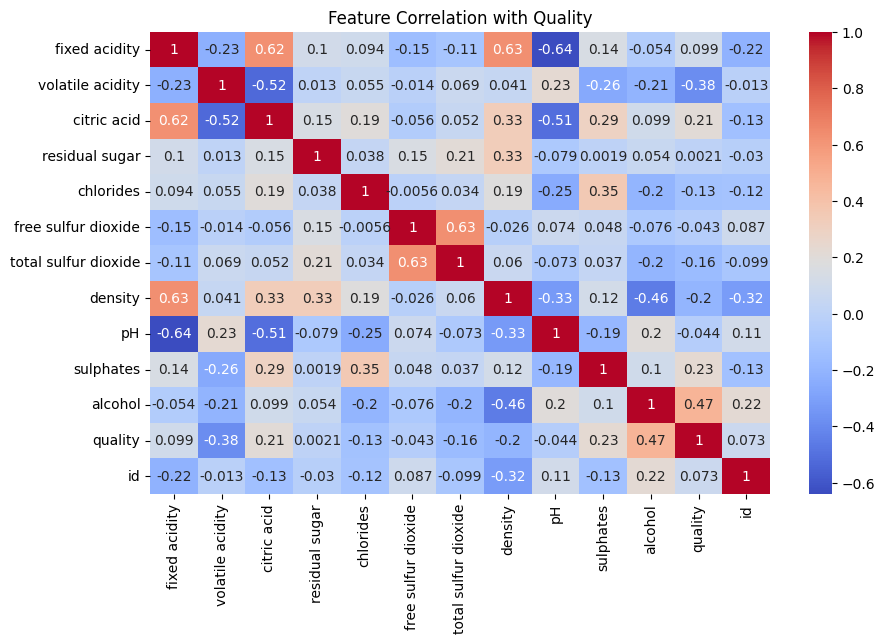

Improved submission file created!


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. Load data
# train_df = pd.read_csv(r"C:\Users\JIYA\Downloads\train (1).csv")
# val_df = pd.read_csv(r"C:\Users\JIYA\Downloads\validation (1).csv")

train_df = pd.read_csv("train (1).csv")
val_df = pd.read_csv("validation (1).csv")

# 2. Use ALL 11 physicochemical features instead of just 7
# This gives the model more data to find a better fit
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

X_train = train_df[features]
y_train = train_df['quality']
X_val = val_df[features]

# 3. FEATURE SCALING (Standardization)
# This makes features like 'total sulfur dioxide' (large numbers) and
# 'chlorides' (small numbers) equally important to the model.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Train the Linear Regression Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# 5. Check Feature Importance (Correlation)
# Use this to see which features actually matter
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Quality")
plt.show()

# 6. Predict and Create Submission
predictions = lm.predict(X_val_scaled)

improved_submission_reg = pd.DataFrame({
    'id': val_df['id'],
    'quality': predictions
})

improved_submission_reg.to_csv('improved_submission_regression.csv', index=False)
print("Improved submission file created!")

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load data
# train_df = pd.read_csv(r"C:\Users\JIYA\Downloads\train (1).csv")
# val_df = pd.read_csv(r"C:\Users\JIYA\Downloads\validation (1).csv")

train_df = pd.read_csv("train (1).csv")
val_df = pd.read_csv("validation (1).csv")

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

X_train = train_df[features]
y_train = train_df['quality']
X_val = val_df[features]

# 2. Scaling is MANDATORY for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 3. Apply PCA
# We reduce 11 features down to 8 components to remove the "noise"
# while keeping 95%+ of the information.
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# 4. Train Linear Regression on the Principal Components
lm_pca = LinearRegression()
lm_pca.fit(X_train_pca, y_train)

# 5. Predict
predictions = lm_pca.predict(X_val_pca)

# Create submission
PCA_submission_reg = pd.DataFrame({'id': val_df['id'], 'quality': predictions})
PCA_submission_reg.to_csv('PCA_submission_regression.csv', index=False)

# Check how much variance we captured
print(f"Variance explained by 8 components: {sum(pca.explained_variance_ratio_):.2f}")

Variance explained by 8 components: 0.93
